In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("/home/zack83/Dropbox/Tripura_University/Project_Final/Databases/Original_Databaes/hcc-data-complete-balanced.csv")

In [3]:
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,"7,1","0,7",1,"3,5","0,5","52,5",37,856,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7,"0,58",1,"1,8","0,85",32,10,18,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,"2,1",5,13,"0,1",28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,"8,1","1,11",2,"15,7","0,2",131,78,1316,0
4,1,1,1,1,0,1,0,1,0,1,...,109,"6,9","1,8",1,9,"0,1",59,15,22,1


In [5]:
df['Gender'] = df['Gender'].replace({0:1, 1:0})
df['Ascites'] = df['Ascites'].replace({1:0, 2:1, 3:1})
df['Class'] = df['Class'].replace({0:1, 1:0})
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0,1,0,0,0,0,1,0,1,...,150,"7,1","0,7",1,"3,5","0,5","52,5",37,856,0
1,1,0,0,0,0,0,1,1,0,1,...,120,7,"0,58",1,"1,8","0,85",32,10,18,0
2,0,0,1,1,0,1,0,1,0,1,...,109,7,"2,1",5,13,"0,1",28,6,16,0
3,0,1,1,0,0,0,0,1,0,1,...,174,"8,1","1,11",2,"15,7","0,2",131,78,1316,1
4,0,1,1,1,0,1,0,1,0,1,...,109,"6,9","1,8",1,9,"0,1",59,15,22,0


In [6]:
df['Class'].value_counts()

Class
0    102
1    102
Name: count, dtype: int64

In [7]:
#clearing the dataset for , instead of .
df['TP'] = df['TP'].str.replace(',', '.')
df['Packs_year'] = df['Packs_year'].str.replace(',','.')
df['INR'] = df['INR'].str.replace(',','.')
df['AFP'] = df['AFP'].str.replace(',','.')
df['Hemoglobin'] = df['Hemoglobin'].str.replace(',','.')
df['Leucocytes'] = df['Leucocytes'].str.replace(',','.')
df['Platelets'] = df['Platelets'].str.replace(',','.')
df['Albumin'] = df['Albumin'].str.replace(',','.')
df['Total_Bil'] = df['Total_Bil'].str.replace(',','.')
df['Creatinine'] = df['Creatinine'].str.replace(',','.')
df['Major_Dim'] = df['Major_Dim'].str.replace(',','.')
df['Dir_Bil'] = df['Dir_Bil'].str.replace(',','.')
df['Iron'] = df['Iron'].str.replace(',','.')
df['Sat'] = df['Sat'].str.replace(',','.')
df['Ferritin'] = df['Ferritin'].str.replace(',','.')
df['TP'] = df['TP'].str.replace(',','.')
df['MCV'] = df['MCV'].str.replace(',','.')

In [8]:
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,52.5,37,856,0
1,1,0,0,0,0,0,1,1,0,1,...,120,7,0.58,1,1.8,0.85,32,10,18,0
2,0,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,0
3,0,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,131,78,1316,1
4,0,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,0.1,59,15,22,0


In [9]:
df['Packs_year'] = pd.to_numeric(df['Packs_year'])
df['INR'] = pd.to_numeric(df['INR'])
df['AFP'] = pd.to_numeric(df['AFP'])
df['Hemoglobin'] = pd.to_numeric(df['Hemoglobin'])
df['Leucocytes'] = pd.to_numeric(df['Leucocytes'])
df['Platelets'] = pd.to_numeric(df['Platelets'])
df['Albumin'] = pd.to_numeric(df['Albumin'])
df['Total_Bil'] = pd.to_numeric(df['Total_Bil'])
df['Creatinine'] = pd.to_numeric(df['Creatinine'])
df['Major_Dim'] = pd.to_numeric(df['Major_Dim'])
df['Dir_Bil'] = pd.to_numeric(df['Dir_Bil'])
df['Iron'] = pd.to_numeric(df['Iron'])
df['Sat'] = pd.to_numeric(df['Sat'])
df['Ferritin'] = pd.to_numeric(df['Ferritin'])
df['TP'] = pd.to_numeric(df['TP'])
df['MCV'] = pd.to_numeric(df['MCV'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          204 non-null    int64  
 1   Symptoms        204 non-null    int64  
 2   Alcohol         204 non-null    int64  
 3   HBsAg           204 non-null    int64  
 4   HBeAg           204 non-null    int64  
 5   HBcAb           204 non-null    int64  
 6   HCVAb           204 non-null    int64  
 7   Cirrhosis       204 non-null    int64  
 8   Endemic         204 non-null    int64  
 9   Smoking         204 non-null    int64  
 10  Diabetes        204 non-null    int64  
 11  Obesity         204 non-null    int64  
 12  Hemochro        204 non-null    int64  
 13  AHT             204 non-null    int64  
 14  CRI             204 non-null    int64  
 15  HIV             204 non-null    int64  
 16  NASH            204 non-null    int64  
 17  Varices         204 non-null    int

In [11]:
X=df.drop(['Total_Bil','Grams_day','INR','PS','Grams_day','Packs_year','Class'],axis = 1)
y=df['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state = 0)

print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

Train Shape: (183, 44)
Test Shape: (21, 44)


In [13]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.7142857142857143
Report card of this model - 
              precision    recall  f1-score   support

           0      0.667     0.800     0.727        10
           1      0.778     0.636     0.700        11

    accuracy                          0.714        21
   macro avg      0.722     0.718     0.714        21
weighted avg      0.725     0.714     0.713        21

Accuracy score -  0.7142857142857143


In [14]:
dtree = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf = 10)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.8095238095238095
Report card of this model - 
              precision    recall  f1-score   support

           0      0.750     0.900     0.818        10
           1      0.889     0.727     0.800        11

    accuracy                          0.810        21
   macro avg      0.819     0.814     0.809        21
weighted avg      0.823     0.810     0.809        21

Accuracy score -  0.8095238095238095


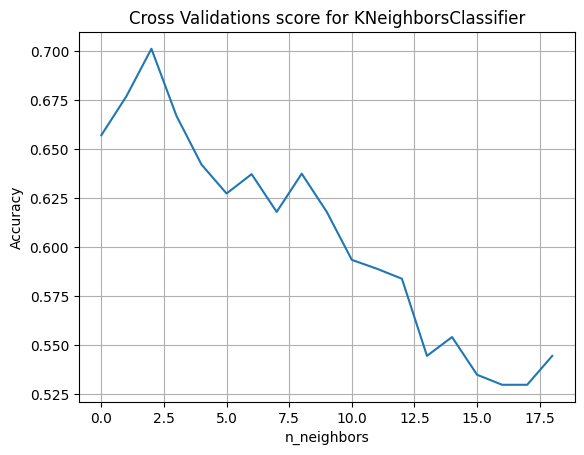

In [15]:
hist = []
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot(hist)
plt.title('Cross Validations score for KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
score = knn.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_knn))

Score of the model is -  0.6190476190476191
Report card of this model - 
              precision    recall  f1-score   support

           0      0.583     0.700     0.636        10
           1      0.667     0.545     0.600        11

    accuracy                          0.619        21
   macro avg      0.625     0.623     0.618        21
weighted avg      0.627     0.619     0.617        21

Accuracy score -  0.6190476190476191


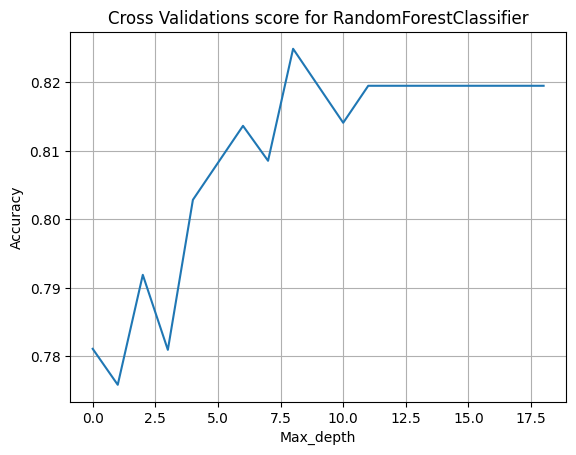

In [17]:
hist1 = []
for i in range(1,20):
    clf = RandomForestClassifier(n_estimators=80, max_depth=i, random_state=0)
    cross_val = cross_val_score(clf, X_train, y_train, cv=5)
    hist1.append(np.mean(cross_val))
plt.plot(hist1)
plt.title('Cross Validations score for RandomForestClassifier')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid()

In [18]:
ran_for = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
ran_for.fit(X_train,y_train)
y_pred_ran = ran_for.predict(X_test)
score = ran_for.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_ran, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_ran))

Score of the model is -  0.9047619047619048
Report card of this model - 
              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.818     0.900        11

    accuracy                          0.905        21
   macro avg      0.917     0.909     0.905        21
weighted avg      0.921     0.905     0.904        21

Accuracy score -  0.9047619047619048


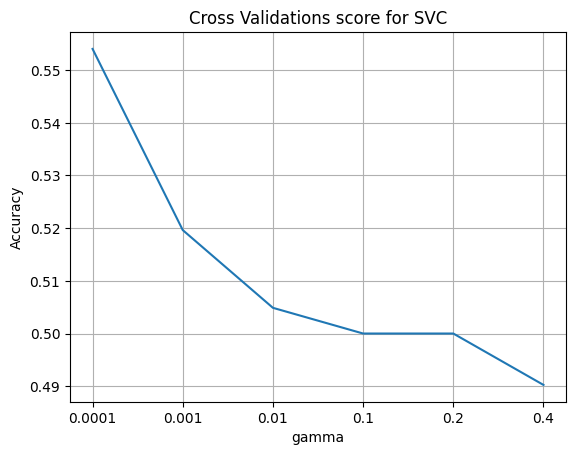

In [19]:
grid = [0.0001,0.001, 0.01, 0.1,0.2,0.4]
hist = []
for val in grid:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in grid], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
svm = SVC(kernel= "linear",C=0.01, random_state = 0 , gamma=0.1)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
score = svm.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_svm))

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier         # using random forest to explain for ease
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X, y)

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_size=(30,15), alpha=0.2, plot_type='bar')

In [ ]:
df.to_csv("/home/zack83/Dropbox/Tripura_University/Project_Final/Databases/Cleaned_Part1/HCCTest000.csv",index = False)